# $\epsilon$  ($p$) is decoupled from $\epsilon$  ($\mu$)

In [4]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

In [5]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [6]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [10]:
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices',only_in_FV=False)

285009 ccqe candidate pairs, 187262 in FV
74387 are 1mu-1p, 39.7%
55226 are other pairs, 29.5%
155396 are cosmic, 83.0%
--------------------------------------------------------------
36843 are CC 1p 0pi, 19.7%
--------------------------------------------------------------
40729 are CC 1p, 21.7%
I finished loading overlay samples. We have in total 285009 pairs


## re-scaling of the cosmic in the overlay, and application of the cuts

In [11]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
print 'applied cuts to overlay'

applied cuts to overlay


In [12]:
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
    if 'CC 1p' in pair_type: print_line()
    print len(selected_overlay[pair_type]),'selected events from type',pair_type

13113 selected events from type 1mu-1p
319 selected events from type other pairs
119 selected events from type cosmic
--------------------------------------------------------------
10514 selected events from type CC 1p 0pi
--------------------------------------------------------------
10877 selected events from type CC 1p


In [13]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/'
                       +versions['overlay date']
                       +'/'
                       +versions['Overlay']+'_'+versions['overlay date']+'_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p = GENIEall[(GENIEall['IsCC_1p_200MeVc']==True)]
print len(GENIE_CC1p),'GENIE CC1p events'

503110  GENIE interaction
180342 GENIE CC1p events


In [10]:
GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])
selected_CC1p0pi_tightFV['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi_tightFV['truth_Pmu_theta'])
overlay_tightFV['truth_Pmu_cos_theta'] = np.cos(overlay_tightFV['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
def theta_rad_label(theta):
    if theta==0: return "0"
    if np.abs(theta-np.pi)<0.001: return "$\pi$"
    for n in range(2,10): 
        if np.abs(theta-(np.pi/n))<0.001: 
            return "$\pi/%d$"%n
    return "$%.1f\pi$"%(theta/np.pi)

# What is the acceptance as a function of $p_p$ and $\theta_p$ in different bins of $p_\mu$ and $\theta_\mu$

In [12]:
large_bins_Pmu_min = np.array([0,0.45])
large_bins_Pmu_max = np.array([large_bins_Pmu_min[1],2])
large_bins_Pmu_centers = 0.5*(large_bins_Pmu_min+large_bins_Pmu_max)
large_bins_Pmu_theta_min = np.array([0,0.3*np.pi])
large_bins_Pmu_theta_max = np.array([large_bins_Pmu_theta_min[1],np.pi])
large_bins_Pmu_theta_centers = 0.5*(large_bins_Pmu_theta_min+large_bins_Pmu_theta_max)

hcc1p0pi_muon_bins = np.zeros((2,2))

# proton acceptance parameters
Pp_bins = linspace(0,1.4,6)
Pp_theta_bins = linspace(0,np.pi,6)
Pp_xcenters,Pp_theta_ycenters = 0.5*(Pp_bins[1:]+Pp_bins[:-1]),0.5*(Pp_theta_bins[1:]+Pp_theta_bins[:-1])
nx_p,ny_p = len(Pp_bins)-1,len(Pp_theta_bins)-1


In [13]:
def sample_in_xy_bin(sample,xmin,xmax,ymin,ymax,xvar,yvar):
    return sample[(sample[xvar]>xmin)&(sample[xvar]<xmax)&(sample[yvar]>ymin)&(sample[yvar]<ymax)]
def sample_in_muon_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max):
    return sample_in_xy_bin(sample,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max,xvar='truth_Pmu',yvar='truth_Pmu_theta')
def sample_in_proton_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max):
    return sample_in_xy_bin(sample,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max,xvar='truth_Pp',yvar='truth_Pp_theta')

In [21]:
h_p_acc,h_p_err,h_p_err_rel = dict(),dict(),dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        print 'len(selected_CC1p0pi_tightFV):',len(selected_CC1p0pi_tightFV)
        selected_cc1p0pi_muon_bin = sample_in_muon_bin(selected_CC1p0pi_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)
        generated_muon_bin = sample_in_muon_bin(GENIE_CC1p0pi,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        
        overlay_muon_bin = sample_in_muon_bin(overlay_tightFV,Pmu_min,Pmu_max,Pmu_theta_min,Pmu_theta_max)        

        hcc1p0pi_muon_bins[iPmu][iPmu_theta] = len(selected_cc1p0pi_muon_bin)
        print 'hcc1p0pi_muon_bins[iPmu][iPmu_theta]:',hcc1p0pi_muon_bins[iPmu][iPmu_theta]
        
        # now check the proton acceptance in this muon-kinematics bin
        hgen,hacc,heff,heff_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        hacc,herr,herr_rel = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))


        for iPp in range(nx_p):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_theta in range(ny_p):
                Pp_theta_min,Pp_theta_max = Pp_theta_bins[iPp_theta],Pp_theta_bins[iPp_theta+1]        

                # efficiency
                gen_proton_bin = sample_in_proton_bin(generated_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                acc_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hgen[iPp][iPp_theta] = len(gen_proton_bin)        
                hacc[iPp][iPp_theta] = len(acc_proton_bin)        
                heff[iPp][iPp_theta] = float(hacc[iPp][iPp_theta])/(hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta]>0 else 1)
                heff_err[iPp][iPp_theta] = heff[iPp][iPp_theta]*np.sqrt( (1./hgen[iPp][iPp_theta] if hgen[iPp][iPp_theta] else 0)                                                    
                                                                + (1./hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta] else 0) )

                # purity 
                overlay_proton_bin = sample_in_proton_bin(overlay_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)            
                cc1p0pi_proton_bin = sample_in_proton_bin(selected_cc1p0pi_muon_bin,Pp_min,Pp_max,Pp_theta_min,Pp_theta_max)

                hall[iPp][iPp_theta] = len(overlay_proton_bin)        
                hcc1p0pi[iPp][iPp_theta] = len(cc1p0pi_proton_bin)          
                hpur[iPp][iPp_theta] = float(hcc1p0pi[iPp][iPp_theta])/(hall[iPp][iPp_theta] if hall[iPp][iPp_theta]>0 else 1)                
                hpur_err[iPp][iPp_theta] = hpur[iPp][iPp_theta]*np.sqrt( (1./hall[iPp][iPp_theta] if hall[iPp][iPp_theta] else 0)                                                
                                                                        + (1./hcc1p0pi[iPp][iPp_theta] if hcc1p0pi[iPp][iPp_theta] else 0) )

                # acceptance 
                hacc[iPp][iPp_theta] = heff[iPp][iPp_theta]/(hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta]>0 else 1)
                herr[iPp][iPp_theta] = hacc[iPp][iPp_theta]*np.sqrt( np.square(heff_err[iPp][iPp_theta]/heff[iPp][iPp_theta] if heff[iPp][iPp_theta] else 0) 
                                                    + np.square(hpur_err[iPp][iPp_theta]/hpur[iPp][iPp_theta] if hpur[iPp][iPp_theta] else 0) )
                herr_rel[iPp][iPp_theta] = herr[iPp][iPp_theta]/hacc[iPp][iPp_theta] if hacc[iPp][iPp_theta]>0 else 0

        h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = hacc.T
        h_p_err['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr.T
        h_p_err_rel['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)] = herr_rel.T
print 'done.'

len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 440.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1543.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 1651.0
len(selected_CC1p0pi_tightFV): 4064
hcc1p0pi_muon_bins[iPmu][iPmu_theta]: 422.0
done.


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/Pmu_theta_large_bins.pdf


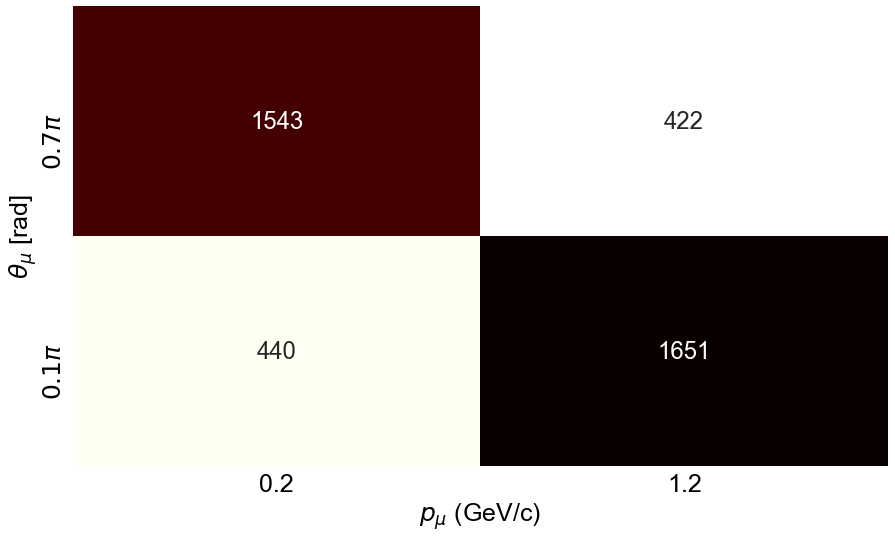

In [22]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2);
sns.heatmap(hcc1p0pi_muon_bins.T.astype(np.int),annot=True,cmap='hot_r',fmt="d"         
            ,xticklabels=["%.1f"%tick for tick in large_bins_Pmu_centers]
            ,yticklabels=["$%.1f\pi$"%(tick/np.pi) for tick in large_bins_Pmu_theta_centers]
            ,cbar=False)
set_axes(ax,r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]')
ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'Pmu_theta_large_bins.pdf')

Integral: 0.365874967491
Integral: 0.22420689307
Integral: 0.138195751318
Integral: 0.164845789245
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/Pp_acceptance_in_large_Pmu_bins.pdf


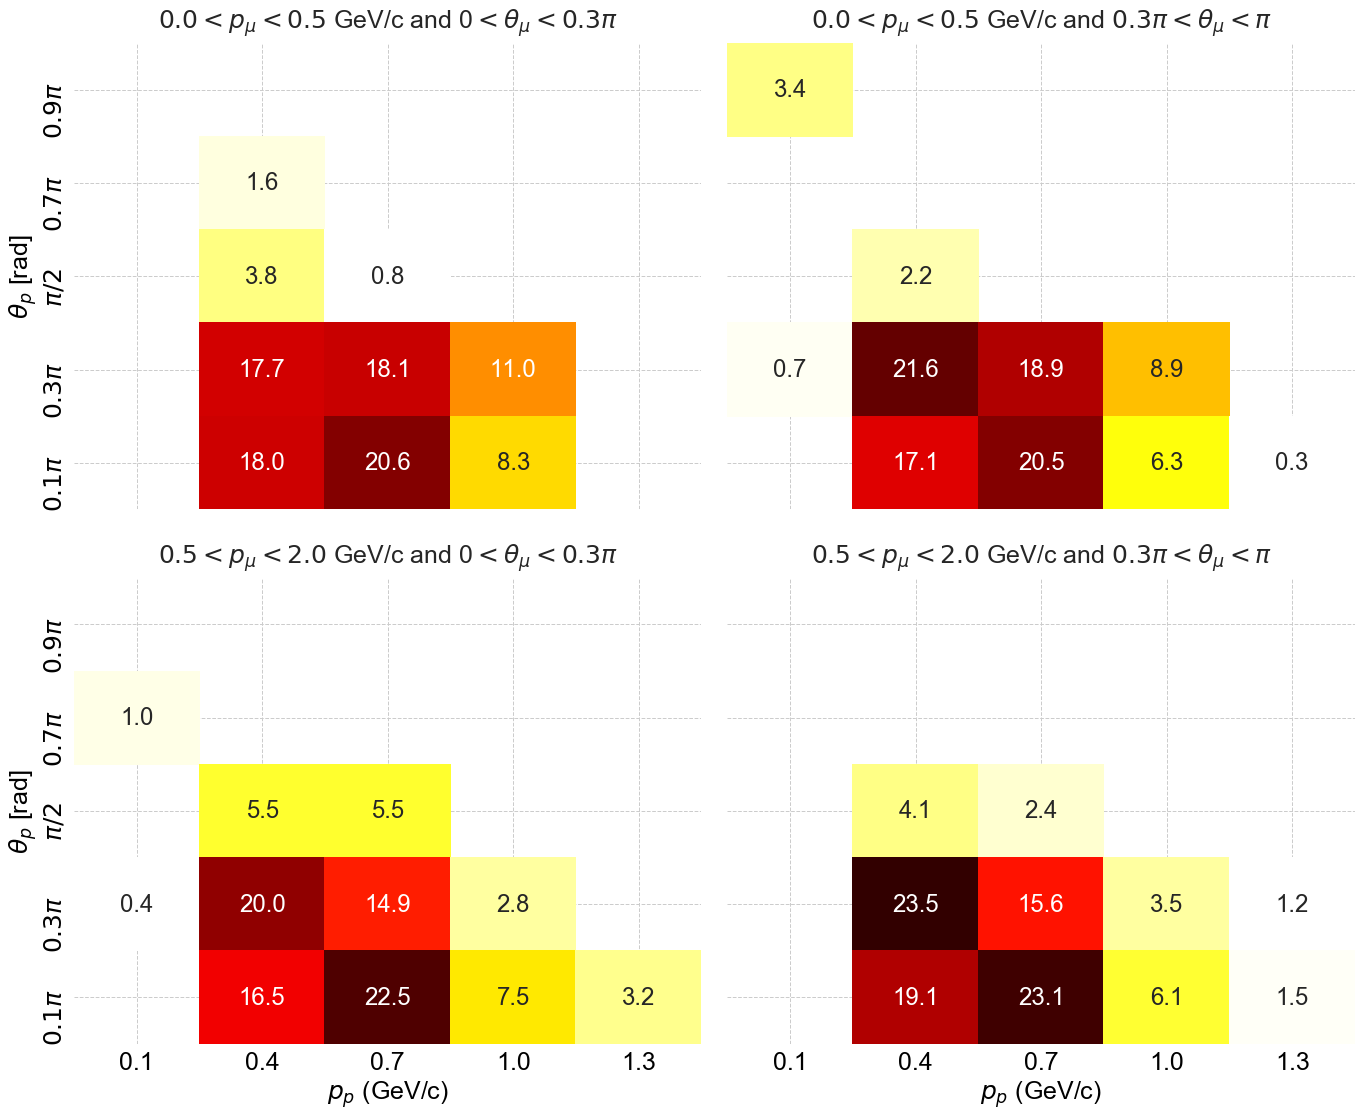

In [25]:
fig = plt.figure(figsize=(19.416,16))
sns.set_style('white')
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_theta,(Pmu_theta_min,Pmu_theta_max) in enumerate(zip(large_bins_Pmu_theta_min,large_bins_Pmu_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_theta+1)
        histo = h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)]
        Integral = np.sum(h_p_acc['iPmu %d iPmu_theta %d'%(iPmu,iPmu_theta)])
        print 'Integral:',Integral
        histo = histo/Integral
        histo[histo <= 0] = None
        sns.heatmap(100*histo,annot=True,cmap='hot_r',fmt=".1f",vmin=None,vmax=25
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=[theta_rad_label(tick) for tick in Pp_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_theta==1 or iPmu_theta==3 else  r'$\theta_p$ [rad]'
                 ,remove_ticks_y=True if iPmu_theta==1 or iPmu_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c and %s$<\theta_\mu<$%s'%(Pmu_min,Pmu_max,theta_rad_label(Pmu_theta_min),theta_rad_label(Pmu_theta_max))
                 )
        ax.invert_yaxis()
plt.tight_layout()
save_figure(figures_path+'Pp_acceptance_in_large_Pmu_bins.pdf')